# CAR FEATURES LINEAR REGRESSION

Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Get a first impression of the database

In [2]:
df = pd.read_csv('data.csv')
len(df)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


It seems the names of the columns are not standarized, let's transform them

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # change the names of columns
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Now we need to 
1. Transform the `market_category` column (has many values in one column)
2. Delet `model` and `market_category`

In [4]:
df = df.join(df['market_category'].str.get_dummies(sep = ','))
df.drop(['model', 'market_category'], axis = 1, inplace = True)


In [5]:
df.head()

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,...,crossover,diesel,exotic,factory_tuner,flex_fuel,hatchback,high-performance,hybrid,luxury,performance
0,bmw,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,...,0,0,0,1,0,0,1,0,1,0
1,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,...,0,0,0,0,0,0,0,0,1,1
2,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,...,0,0,0,0,0,0,1,0,1,0
3,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,...,0,0,0,0,0,0,0,0,1,1
4,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,...,0,0,0,0,0,0,0,0,1,0


Delete NA values

In [7]:
df.dropna(subset = ['engine_fuel_type', 'engine_hp', 'engine_cylinders', 'number_of_doors'], inplace = True)
df.isnull().sum()

make                 0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
crossover            0
diesel               0
exotic               0
factory_tuner        0
flex_fuel            0
hatchback            0
high-performance     0
hybrid               0
luxury               0
performance          0
dtype: int64

In [ ]:
# check distribution of y
sns.distplot(df['msrp'], kde = False)

/home/egirones/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp_log'>

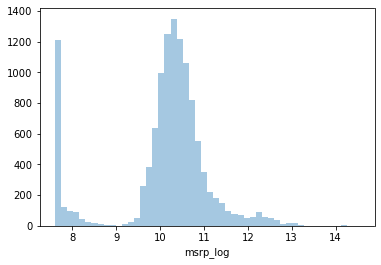

In [8]:
# the predicted y is highly skewed, we need to transform it to log
df['msrp_log'] = np.log1p(df['msrp'])
sns.distplot(df['msrp_log'], kde = False)

# Train/test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# now its ok
# let's split by train/test
X = df.drop(['msrp', 'msrp_log'], axis = 1)
y = df['msrp']
y_log = df['msrp_log']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.33, random_state=42)

<AxesSubplot:>

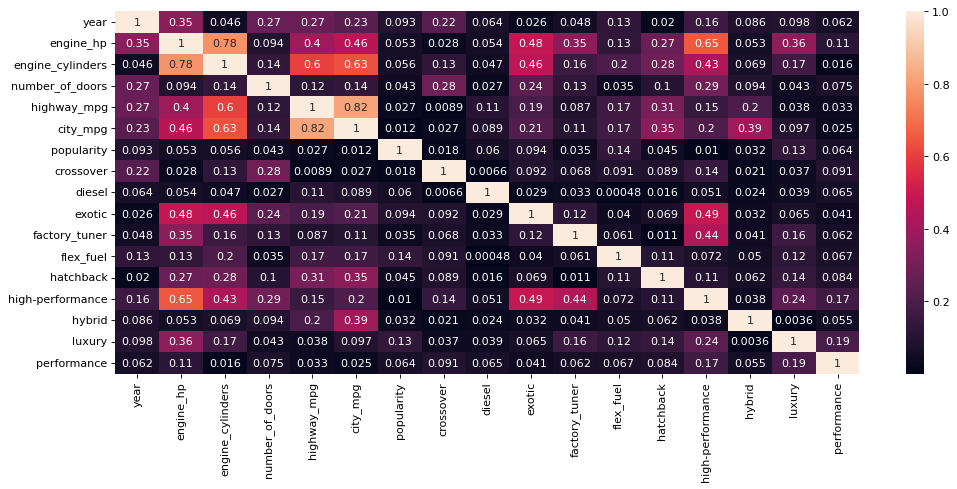

In [12]:
plt.figure(figsize = (15, 6), dpi=80)
sns.heatmap(X_train.corr().abs(), annot = True)

# Tranform the columns

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

We need to do the following:
## Categorical pipeline

1. Impute values in column `market_category`
2. Use `OneHotEncoder()`  

In [14]:
pip_categorical = Pipeline(
    [('cat_inputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotencoder', OneHotEncoder(handle_unknown= 'ignore')), 
])
pip_categorical

Pipeline(steps=[('cat_inputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

## Numerical variables pipeline
1. Create a `YearTransformer`, to transfom a year into years of usage
2. Normalize relevant variables
3. Standarize them

In [15]:
class YearTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print("Transformer initiated")
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X = 2017 - X
        return X

pip_year = make_pipeline(
    YearTransformer()
)
pip_year

Transformer initiated


Pipeline(steps=[('yeartransformer', YearTransformer())])

(array([ 452.,  504.,  460.,  238.,  611.,  644.,  694.,  945., 1328.,
        5936.]),
 array([1990. , 1992.7, 1995.4, 1998.1, 2000.8, 2003.5, 2006.2, 2008.9,
        2011.6, 2014.3, 2017. ]),
 <BarContainer object of 10 artists>)

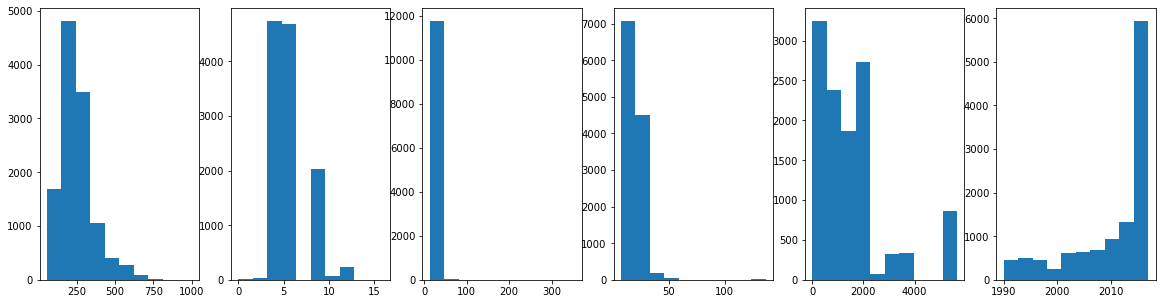

In [16]:
fig, axs = plt.subplots(1,6, figsize=(20,5))

axs[0].hist(df['engine_hp'])
axs[1].hist(df['engine_cylinders'])
axs[2].hist(df['highway_mpg'])
axs[3].hist(df['city_mpg'])
axs[4].hist(df['popularity'])
axs[5].hist(df['year'])


In [17]:
# Transform engine_cylynders
pip_engine_cilinders = make_pipeline(
    MinMaxScaler()
)

# For all of the others (including year)
pip_numerical = Pipeline(
    [('standar', StandardScaler())]
)


In [18]:
from sklearn.compose import make_column_transformer

In [19]:
feature_transform = make_column_transformer(
    (pip_categorical, ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'number_of_doors', 'vehicle_style', 'vehicle_size']),
    (pip_year, ['year']),
    (pip_engine_cilinders, ['engine_cylinders']),
    (pip_numerical, ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']), remainder = 'passthrough'
)
feature_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('cat_inputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['make', 'engine_fuel_type',
                                  'transmission_type', 'driven_wheels',
                                  'number_of_doors', 'vehicle_style',
                                  'vehicle_size']),
                                ('pipeline-2',
                                 Pipeline(steps=[('yeartransformer',
                                                  YearTransformer())]),
                                 ['year']),
                                ('pipeline-3',
                                 Pipeline(steps=[('minmaxs

In [20]:
ml = make_pipeline(
    feature_transform, LinearRegression()
)

In [21]:
ml.fit(X_train, y_train)

Transformer initiated


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('cat_inputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'engine_fuel_type',
                                                   'transmission_type',
                                                   'driven_wheels',
                                                   'number_of_doors',
                                                   'vehicle_style',
                                                   'vehicle_size']),
                           

# Run the linear regression

In [22]:
ml.score(X_train, y_train)

0.8661240581766734

In [23]:
scores = cross_val_score(ml, X_train, y_train, cv = 8)
print(scores)

Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
Transformer initiated
[0.86785056 0.87164205 0.85267693 0.87945882 0.73258725 0.84450592
 0.86586717 0.86035213]


In [24]:
preds = ml.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test, preds)

0.30102899917112036

In [26]:
mean_squared_error(y_test, preds, squared = False)

0.41169346579824384

In [27]:
ml.score(X_test, y_test)

0.8656561737554437

In [28]:
#one would need to transform again the values of y through the following code;
#np.expm1(np.log(VALUE))